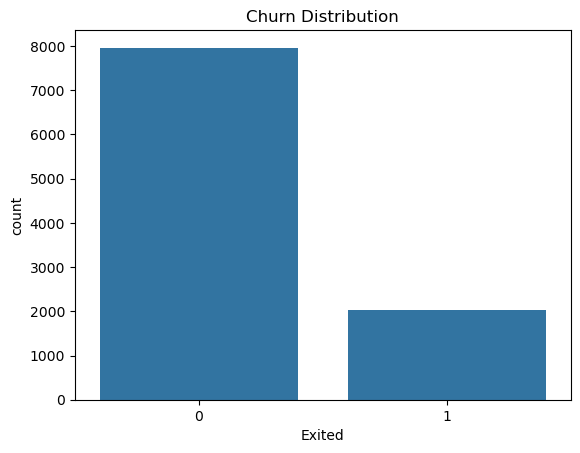

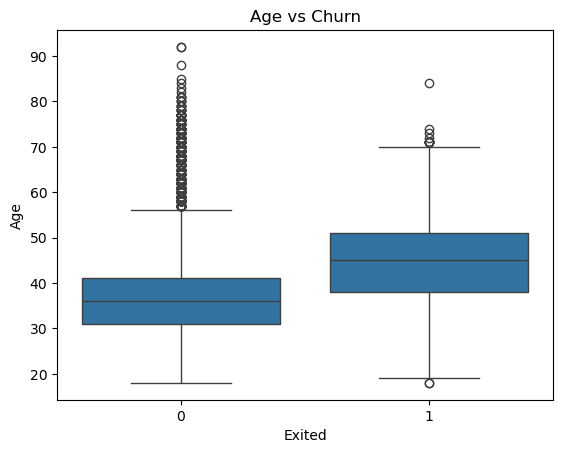

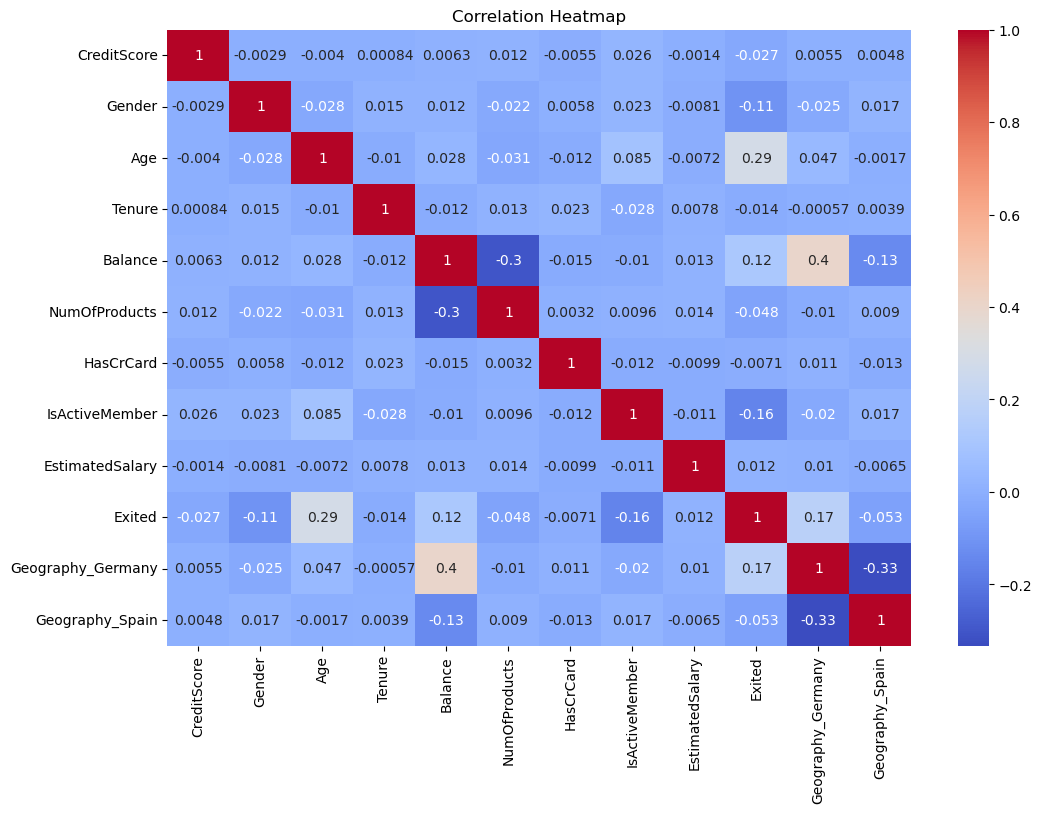

Accuracy: 0.861
Confusion Matrix:
 [[1538   55]
 [ 223  184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



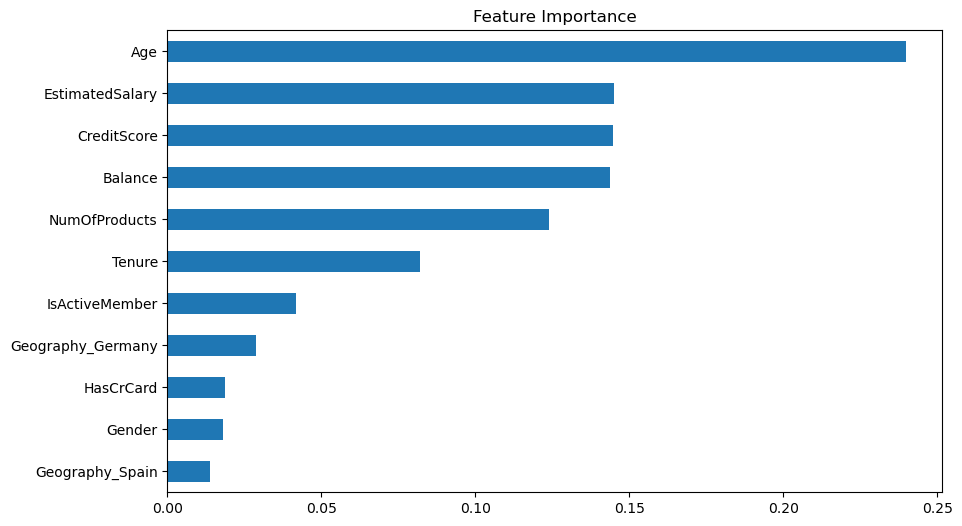


Conclusion:
- Model performed with accuracy around 86.10%.
- Features like Age, CreditScore, and IsActiveMember are strong predictors of churn.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("Churn_Modelling.csv")
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.show()

sns.boxplot(x='Exited', y='Age', data=df)
plt.title('Age vs Churn')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

print("\nConclusion:")
print("- Model performed with accuracy around {:.2f}%.".format(accuracy_score(y_test, y_pred) * 100))
print("- Features like Age, CreditScore, and IsActiveMember are strong predictors of churn.")


### 📝 Conclusion

The churn prediction model performed well, achieving an accuracy of approximately **86.10%** on the test data. Through feature importance analysis, we found that factors like **Age**, **Credit Score**, and **IsActiveMember** had a significant influence on whether a customer is likely to leave the bank.

We observed that older customers and those who are less active tend to churn more frequently. This insight can help the bank take proactive steps, such as offering personalized engagement strategies or loyalty programs to at-risk customers.

Overall, the model provides valuable insights into customer behavior and can assist the bank in reducing churn and improving customer retention.
